




## Observations and Insights 



## 1. There were an equal number of male and female mice, and a good range of ages and tumor sizes which makes this an unbiased study of the effects that these drug regimens had.   

## 2. The correlation between the weight of the mouse and the size of the tumor came out to be 0.84. This shows a large positive correlation between these two variables.

## 3. The two drugs that had the smalles tumors at the end of the study were Capomulin and Remicane. This would imply that these two drugs were most effective at reducing the size of tumors on the mice.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview

merged_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [10]:
# Checking the number of mice.
merged_data['Mouse ID'].nunique()

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated()]
duplicate_mice 

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0                45.0                 0     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 



In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data.drop_duplicates()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[1892 rows x 8 columns]

In [7]:
# Checking the number of mice in the clean DataFrame.
merged_data['Mouse ID'].nunique()

249

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})

summary_df


# This method is the most straighforward, creating multiple series and putting them all together at the end.



Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar and Pie Charts

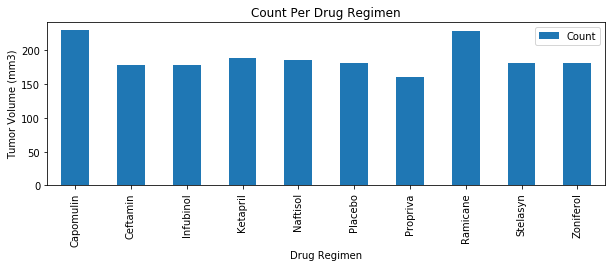

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

merged_df = pd.DataFrame(merged_data.groupby(["Drug Regimen"]).count()).reset_index()

regimen_datapoints = merged_df[["Drug Regimen", "Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})

regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

regimen_datapoints.plot(kind="bar", figsize=(10,3))

plt.title("Count Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('barplot1')
plt.show()
plt.tight_layout()


<BarContainer object of 10 artists>

<Figure size 432x288 with 0 Axes>

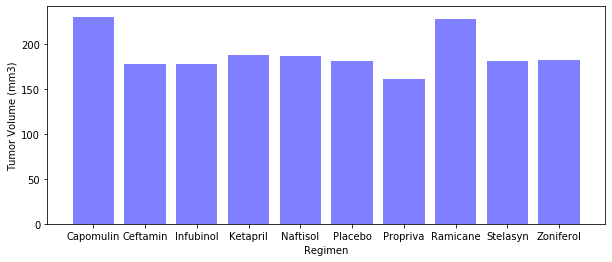

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_regimens = summary_df.index.tolist()

regimen_count = (merged_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = np.arange(len(regimen_count))

x_axis = drug_regimens

plt.savefig('barplot2')
plt.figure(figsize=(10,4))
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Regimen')
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

<Figure size 432x288 with 0 Axes>

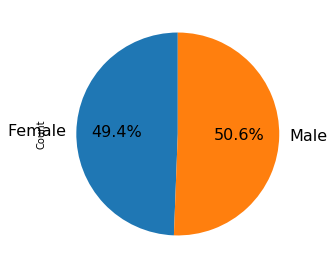

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(merged_data.groupby(["Sex"]).count()).reset_index()

gender_df = gender_df[["Sex", "Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID":"Count"})

plt.savefig('piechart1')
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%', startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

([<matplotlib.patches.Wedge at 0x1c9d211da88>,
 [Text(-1.0997996703027118, 0.02099250347258563, 'Female'),
  Text(1.0997996703027118, -0.02099250347258625, 'Male')],
 [Text(-0.5998907292560246, 0.01145045643959216, '49.4%'),
  Text(0.5998907292560246, -0.011450456439592499, '50.6%')])

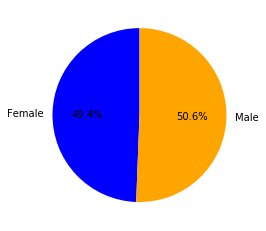

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (merged_data.groupby(["Sex"])["Age_months"].count()).tolist()

labels = ["Female", "Male"]

colors = ["blue", "orange"]

explode = (0,0)

plt.savefig('piechart2')
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct = "%1.1f%%", shadow=False, startangle = 90)

## Quartiles, Outliers and Boxplots

In [19]:
merged_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [20]:
sorted_df = merged_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0      9     b128         45           38.982878                 2   
1   1710     b742         45           38.939633                 0   
2   1834     g288         45           37.074024                 1   
3   1824     g316         45           40.159220                 2   
4   1867     i557         45           47.685963                 1   

  Drug Regimen     Sex  Age_months  Weight (g)  
0    Capomulin  Female           9          22  
1    Capomulin    Male           7          21  
2    Capomulin    Male           3          19  
3    Capomulin  Female          22          22  
4    Capomulin  Female           1          24

In [21]:
capo_data_df= max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
capo_data_df.head().reset_index()

index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0      9     b128         45           38.982878                 2   
1   1710     b742         45           38.939633                 0   
2   1834     g288         45           37.074024                 1   
3   1824     g316         45           40.159220                 2   
4   1867     i557         45           47.685963                 1   

  Drug Regimen     Sex  Age_months  Weight (g)  
0    Capomulin  Female           9          22  
1    Capomulin    Male           7          21  
2    Capomulin    Male           3          19  
3    Capomulin  Female          22          22  
4    Capomulin  Female           1          24

In [22]:
capo_list = capo_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_list = capo_list["Tumor Volume (mm3)"]
capo_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [23]:
quartiles = capo_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The median quartile of tumor volume is: {medianq}")

lower_bound =lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The median quartile of tumor volume is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


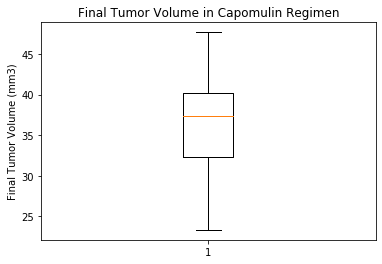

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capo_list)
plt.show()

In [25]:
rami_data_df= max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
rami_data_df.head().reset_index()


index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0    470     a411         45           38.407618                 1   
1    480     a444         45           43.047543                 0   
2    584     a520         45           38.810366                 1   
3    554     a644         45           32.978522                 1   
4    524     c758         45           33.397653                 1   

  Drug Regimen     Sex  Age_months  Weight (g)  
0     Ramicane    Male           3          22  
1     Ramicane  Female          10          25  
2     Ramicane    Male          13          21  
3     Ramicane  Female           7          17  
4     Ramicane    Male           9          17

In [26]:
rami_list = rami_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
rami_list = rami_list["Tumor Volume (mm3)"]
rami_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [27]:
quartiles = rami_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The median quartile of tumor volume is: {medianq}")

lower_bound =lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 30.981175224999998
The upper quartile of tumor volume is: 38.508305307499995
The interquartile range of tumor volume is: 7.527130082499998
The median quartile of tumor volume is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


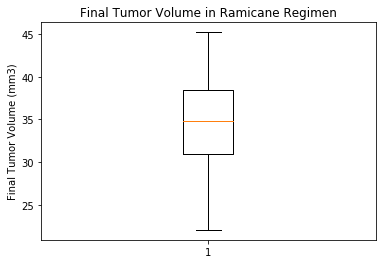

In [28]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(rami_list)
plt.show()

In [29]:
infu_data_df= max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
infu_data_df.head().reset_index()

index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0    907     a203         45           67.973419                 2   
1    289     a251         45           65.525743                 1   
2   1423     a685         45           66.083066                 3   
3    224     c139         45           72.226731                 2   
4   1459     e476         45           62.435404                 1   

  Drug Regimen     Sex  Age_months  Weight (g)  
0    Infubinol  Female          20          23  
1    Infubinol  Female          21          25  
2    Infubinol    Male           8          30  
3    Infubinol    Male          11          28  
4    Infubinol    Male          23          26

In [30]:
infu_list = infu_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_list = infu_list["Tumor Volume (mm3)"]
infu_list

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [31]:
quartiles = rami_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The median quartile of tumor volume is: {medianq}")

lower_bound =lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 30.981175224999998
The upper quartile of tumor volume is: 38.508305307499995
The interquartile range of tumor volume is: 7.527130082499998
The median quartile of tumor volume is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


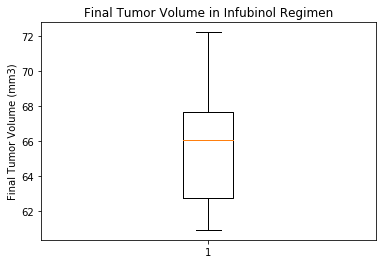

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infu_list)
plt.show()

In [33]:
ceft_data_df= max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
ceft_data_df.head().reset_index()

index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0   1487     a275         45           62.999356                 3   
1   1394     j296         45           61.849023                 3   
2   1477     k210         45           68.923185                 3   
3   1354     l471         45           67.748662                 1   
4   1384     l661         45           59.851956                 3   

  Drug Regimen     Sex  Age_months  Weight (g)  
0     Ceftamin  Female          20          28  
1     Ceftamin  Female          24          30  
2     Ceftamin    Male          15          28  
3     Ceftamin  Female           7          28  
4     Ceftamin    Male          18          26

In [34]:
ceft_list = ceft_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_list = ceft_list["Tumor Volume (mm3)"]
ceft_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [35]:
quartiles = rami_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The median quartile of tumor volume is: {medianq}")

lower_bound =lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 30.981175224999998
The upper quartile of tumor volume is: 38.508305307499995
The interquartile range of tumor volume is: 7.527130082499998
The median quartile of tumor volume is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


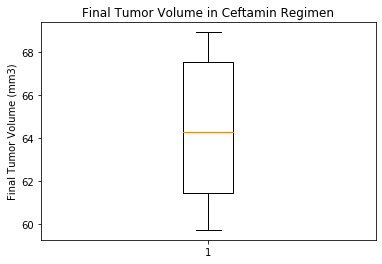

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ceft_list)
plt.show()

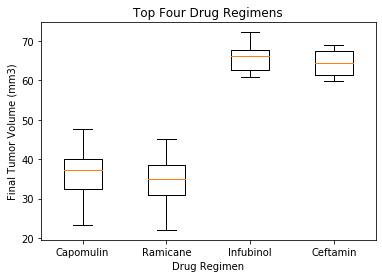

In [43]:
top_four_drugs = [capo_list, rami_list, infu_list, ceft_list]

fig1, ax1 = plt.subplots()
ax1.set_title ('Top Four Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(top_four_drugs, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
capo_df = capo_df.reset_index()
capo_df.head()

index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0      0     b128          0           45.000000                 0   
1      1     b128          5           45.651331                 0   
2      2     b128         10           43.270852                 0   
3      3     b128         15           43.784893                 0   
4      4     b128         20           42.731552                 0   

  Drug Regimen     Sex  Age_months  Weight (g)  
0    Capomulin  Female           9          22  
1    Capomulin  Female           9          22  
2    Capomulin  Female           9          22  
3    Capomulin  Female           9          22  
4    Capomulin  Female           9          22

In [45]:
time_vs_tumor = merged_data[merged_data["Mouse ID"].isin(["b128"])]
time_vs_tumor

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   
5     b128         25           43.262145                 1    Capomulin   
6     b128         30           40.605335                 1    Capomulin   
7     b128         35           37.967644                 1    Capomulin   
8     b128         40           38.379726                 2    Capomulin   
9     b128         45           38.982878                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22  
5  Female           9          22  
6  Female           9          22  
7  Female           9          22  
8  Female           9          22  
9  Female           9          22

In [46]:
time_vs_tumor_red = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_red

Mouse ID  Timepoint  Tumor Volume (mm3)
0     b128          0           45.000000
1     b128          5           45.651331
2     b128         10           43.270852
3     b128         15           43.784893
4     b128         20           42.731552
5     b128         25           43.262145
6     b128         30           40.605335
7     b128         35           37.967644
8     b128         40           38.379726
9     b128         45           38.982878

In [47]:
line_plot_df = time_vs_tumor_red.reset_index()
line_plot_df

index Mouse ID  Timepoint  Tumor Volume (mm3)
0      0     b128          0           45.000000
1      1     b128          5           45.651331
2      2     b128         10           43.270852
3      3     b128         15           43.784893
4      4     b128         20           42.731552
5      5     b128         25           43.262145
6      6     b128         30           40.605335
7      7     b128         35           37.967644
8      8     b128         40           38.379726
9      9     b128         45           38.982878

<Figure size 432x288 with 0 Axes>

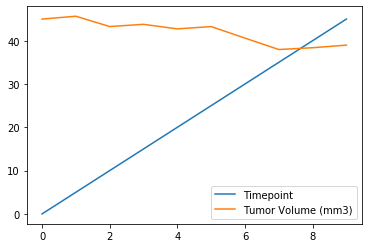

In [48]:
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

plt.savefig('linechart')
lines = line_plot_final.plot.line()

In [49]:
capo_scatter = merged_data[merged_data["Drug Regimen"].isin(["Capomulin"])]
capo_scatter.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [50]:
capo_scatter_plot = capo_scatter.reset_index()

capo_sorted = capo_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capo_sorted

index Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
54    1717     x401         30           32.915292                 0   
48    1711     x401          0           45.000000                 0   
49    1712     x401          5           45.473753                 0   
50    1713     x401         10           39.113891                 0   
51    1714     x401         15           39.776250                 0   
..     ...      ...        ...                 ...               ...   
140   1803     r944         40           41.042045                 2   
141   1804     r944         45           41.581521                 2   
80    1743     r157         10           46.059608                 0   
137   1800     r944         25           41.086991                 1   
79    1742     r157          5           45.597064                 0   

    Drug Regimen     Sex  Age_months  Weight (g)  
54     Capomulin  Female          16          15  
48     Capomulin  Female          16          15  
49     Capomulin  Female          16          15  
50     Capomulin  Female          16          15  
51     Capomulin  Female          16          15  
..           ...     ...         ...         ...  
140    Capomulin    Male          12          25  
141    Capomulin    Male          12          25  
80     Capomulin    Male          22          25  
137    Capomulin    Male          12          25  
79     Capomulin    Male          22          25  

[230 rows x 9 columns]

In [51]:
capo_grouped_weight = capo_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_grouped_weight

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

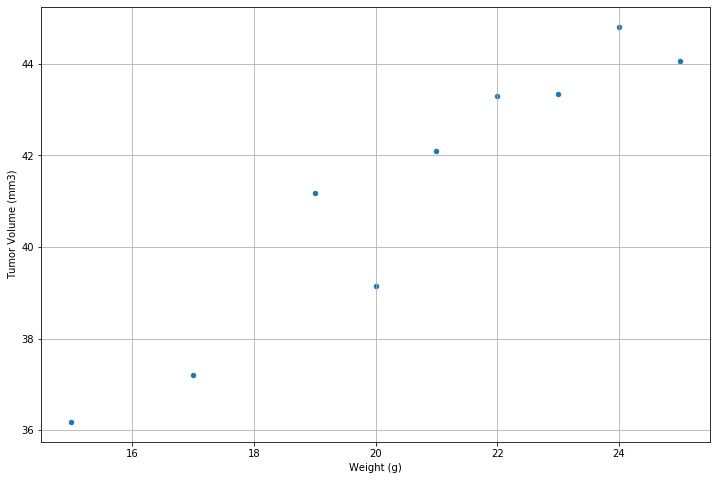

In [52]:
capo_grouped_plot = pd.DataFrame(capo_grouped_weight).reset_index()

capo_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (12,8))

plt.savefig('scatterplot')
capo_scatter

## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [54]:
mouse_weight = average_capo.iloc[:,0]
avg_tumor_volume = average_capo.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")


NameError: name 'average_capo' is not defined

In [55]:
capavg = capo_df.groupby(['Mouse ID']).mean()

In [56]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [57]:
mslope = 0.9544396890241045
bintercept=21.552160532685015

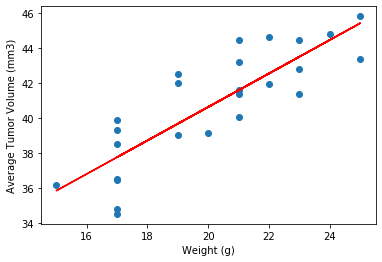

In [58]:
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('linearresgression')
plt.show()